# 04_Plot_Embeddings_Scatter_Pie

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import scanpy as sc
import pandas as pd

# approximate original figure in http://spatial.libd.org/spatialLIBD/
palette_celltype={'L1':'#eb34a8',
                  'L2':'#3486eb',
                  'L3':'#34eb5b',
                  'L4':"#ae34eb",
                  'L5':'#ebdb34',
                  'L6':'#eb9234',
                  'WM':'#000000'}

palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"

import simba as si
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
import matplotlib.pyplot as plt
from benchmarking.plot import generate_umap_figures, generate_pca_figures, combine_images, generate_spatial_kernel_figures

# PCA

In [3]:
pca_fn = "../results/00/pca_rna/run_pca.output.tsv"
pca_output_df = pd.read_csv(pca_fn, sep='\t', index_col=0)

In [ ]:
pca_output_df = generate_pca_figures(
    pca_output_df,
    path_col='run_pca',
    fig_path='../results/00/pca_rna/PCA_scatter_pie',
    adata_color_col='spatialLIBD',
    fig_exts=['png'],
    cell_embedding_adata_fn='adata_CG.h5ad',
    original_adata_CG_dir="../data/human_DLPFC", 
    plot_method='scatter_pie',
    fig_size=(6, 6),
    size=20,
)

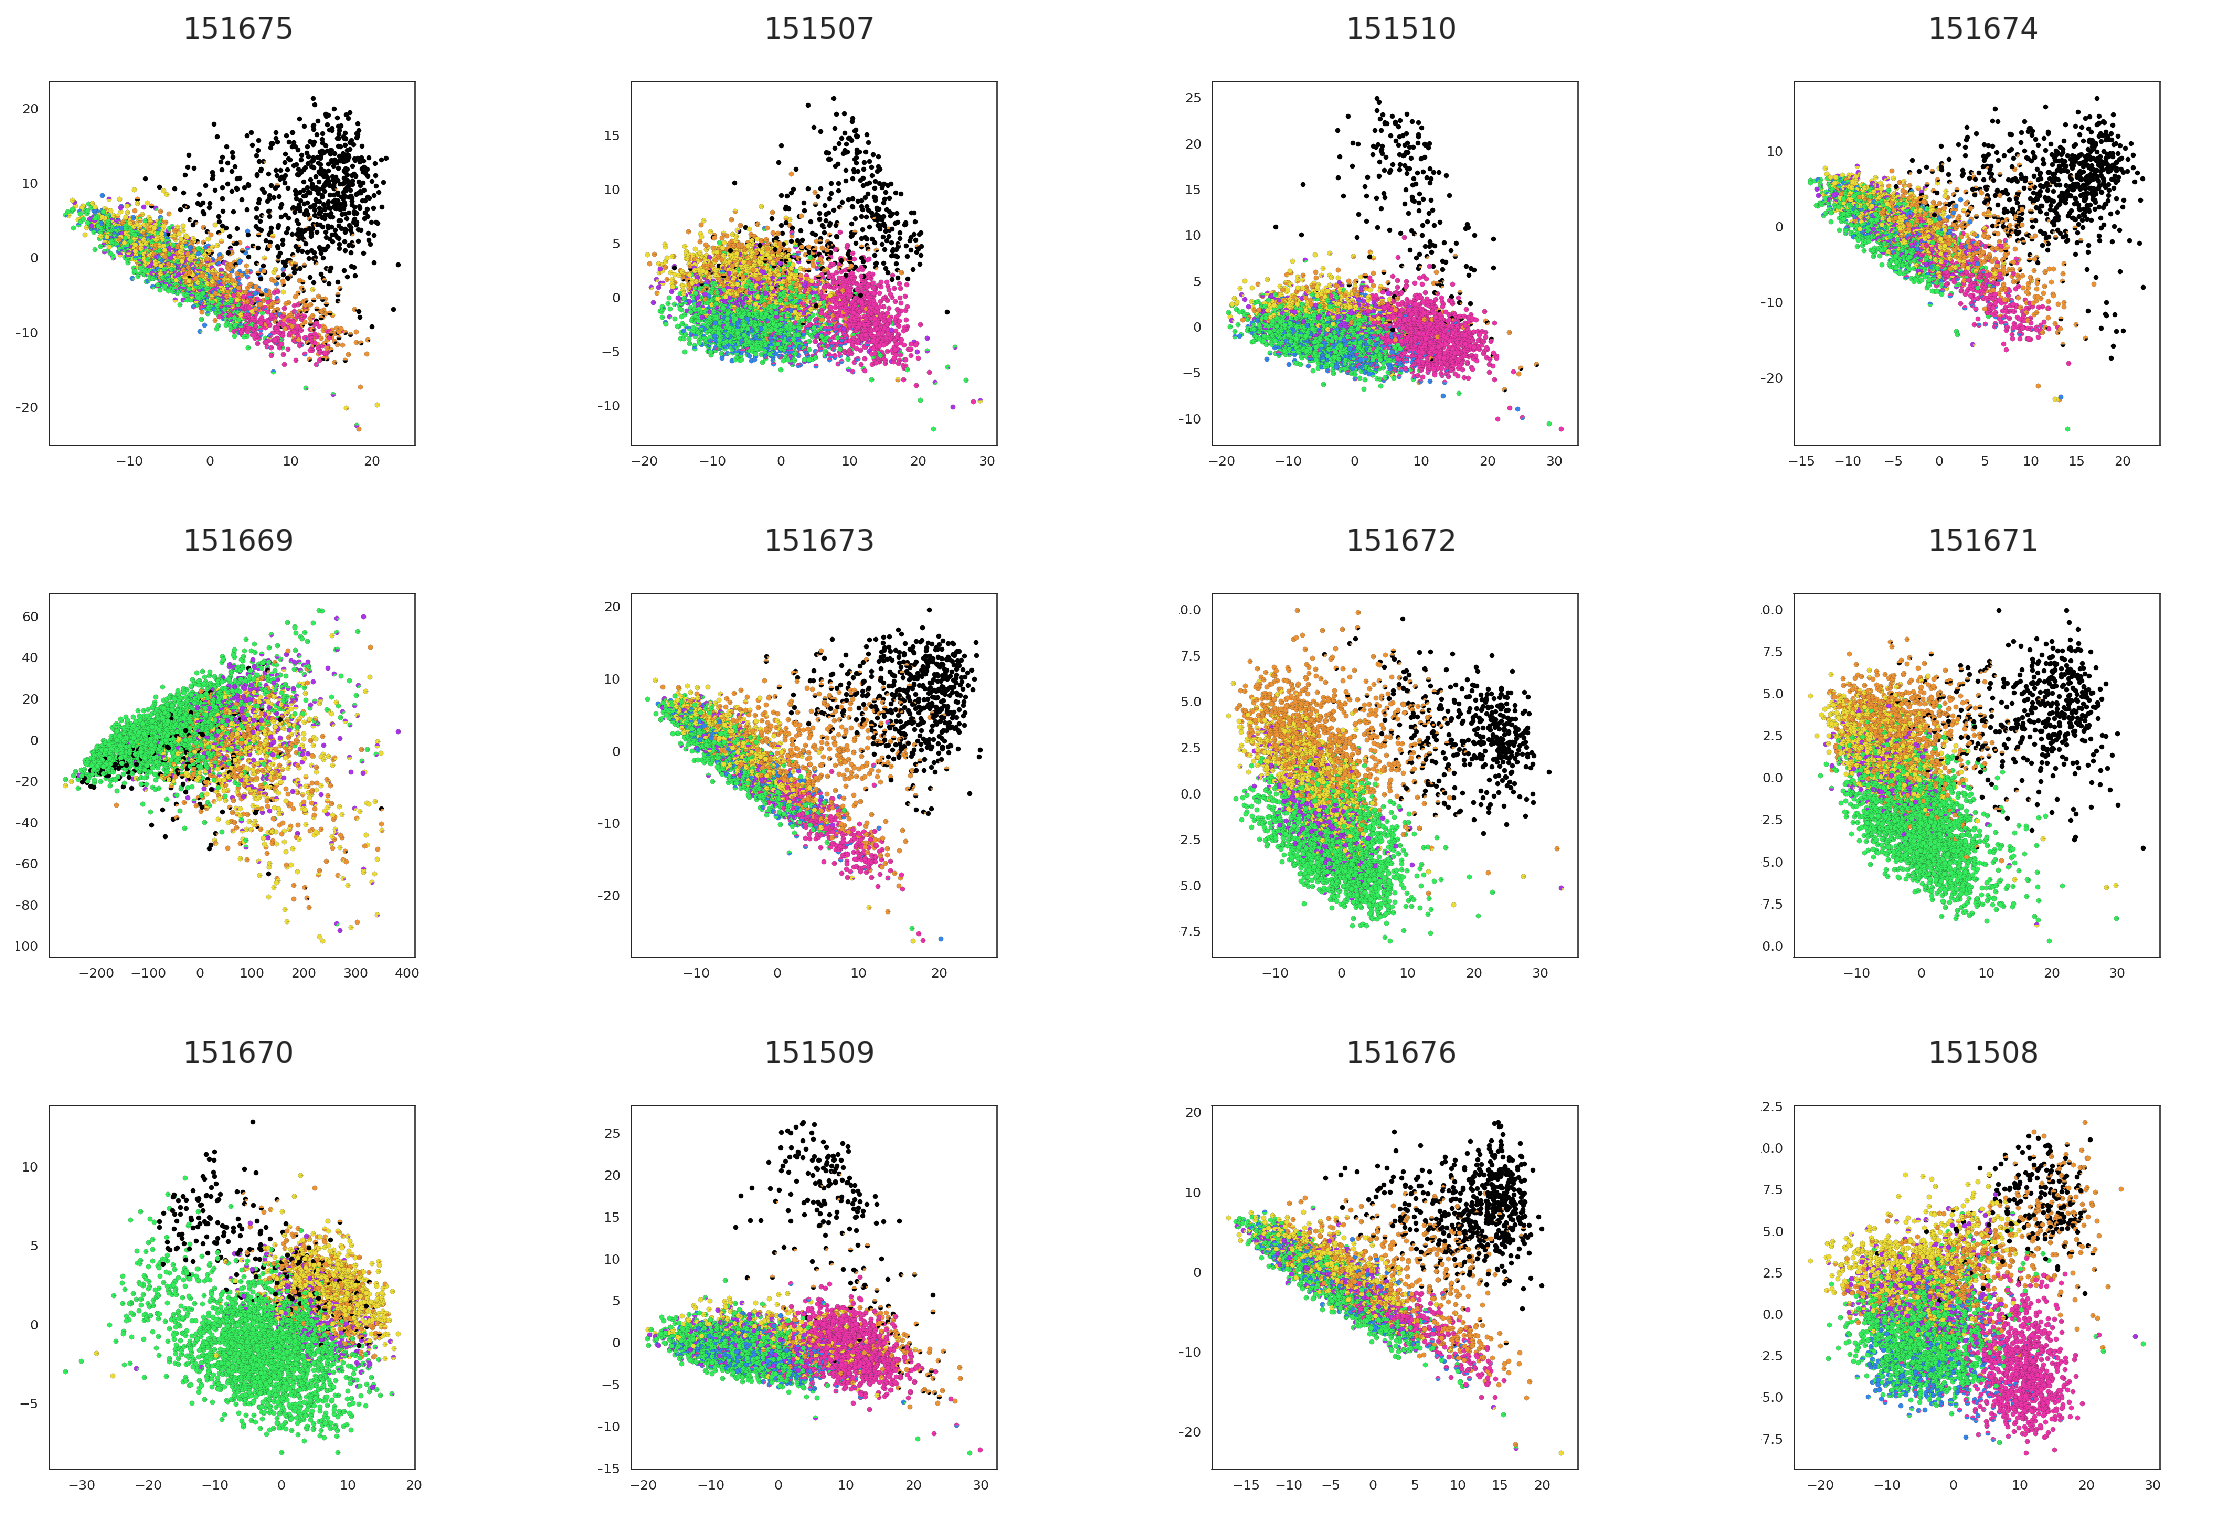

In [11]:
fig, axes = combine_images(
    pca_output_df, img_path_col='pca_fig_png',
    x_min=50,
    x_max=900,
    y_min=50,# top
    y_max=900, # bottom
)
plt.show()

# SIMBA RNA only

In [12]:
simba_rna_only_output_fn = "../results/00/simba_rna_only/run_simba_rna_only.output.tsv"
simba_rna_only_output_df = pd.read_csv(simba_rna_only_output_fn, sep='\t', index_col=0)

In [ ]:
simba_rna_only_output_df = generate_umap_figures(
    simba_rna_only_output_df,
    path_col='run_simba_rna_only',
    original_adata_CG_dir="../data/human_DLPFC", 
    fig_path='../results/00/simba_rna_only/UMAP_scatter_pie',
    adata_color_col='spatialLIBD',
    fig_exts=['png'],
    plot_method='scatter_pie',
    fig_size=(6, 6),
    size=20,
)

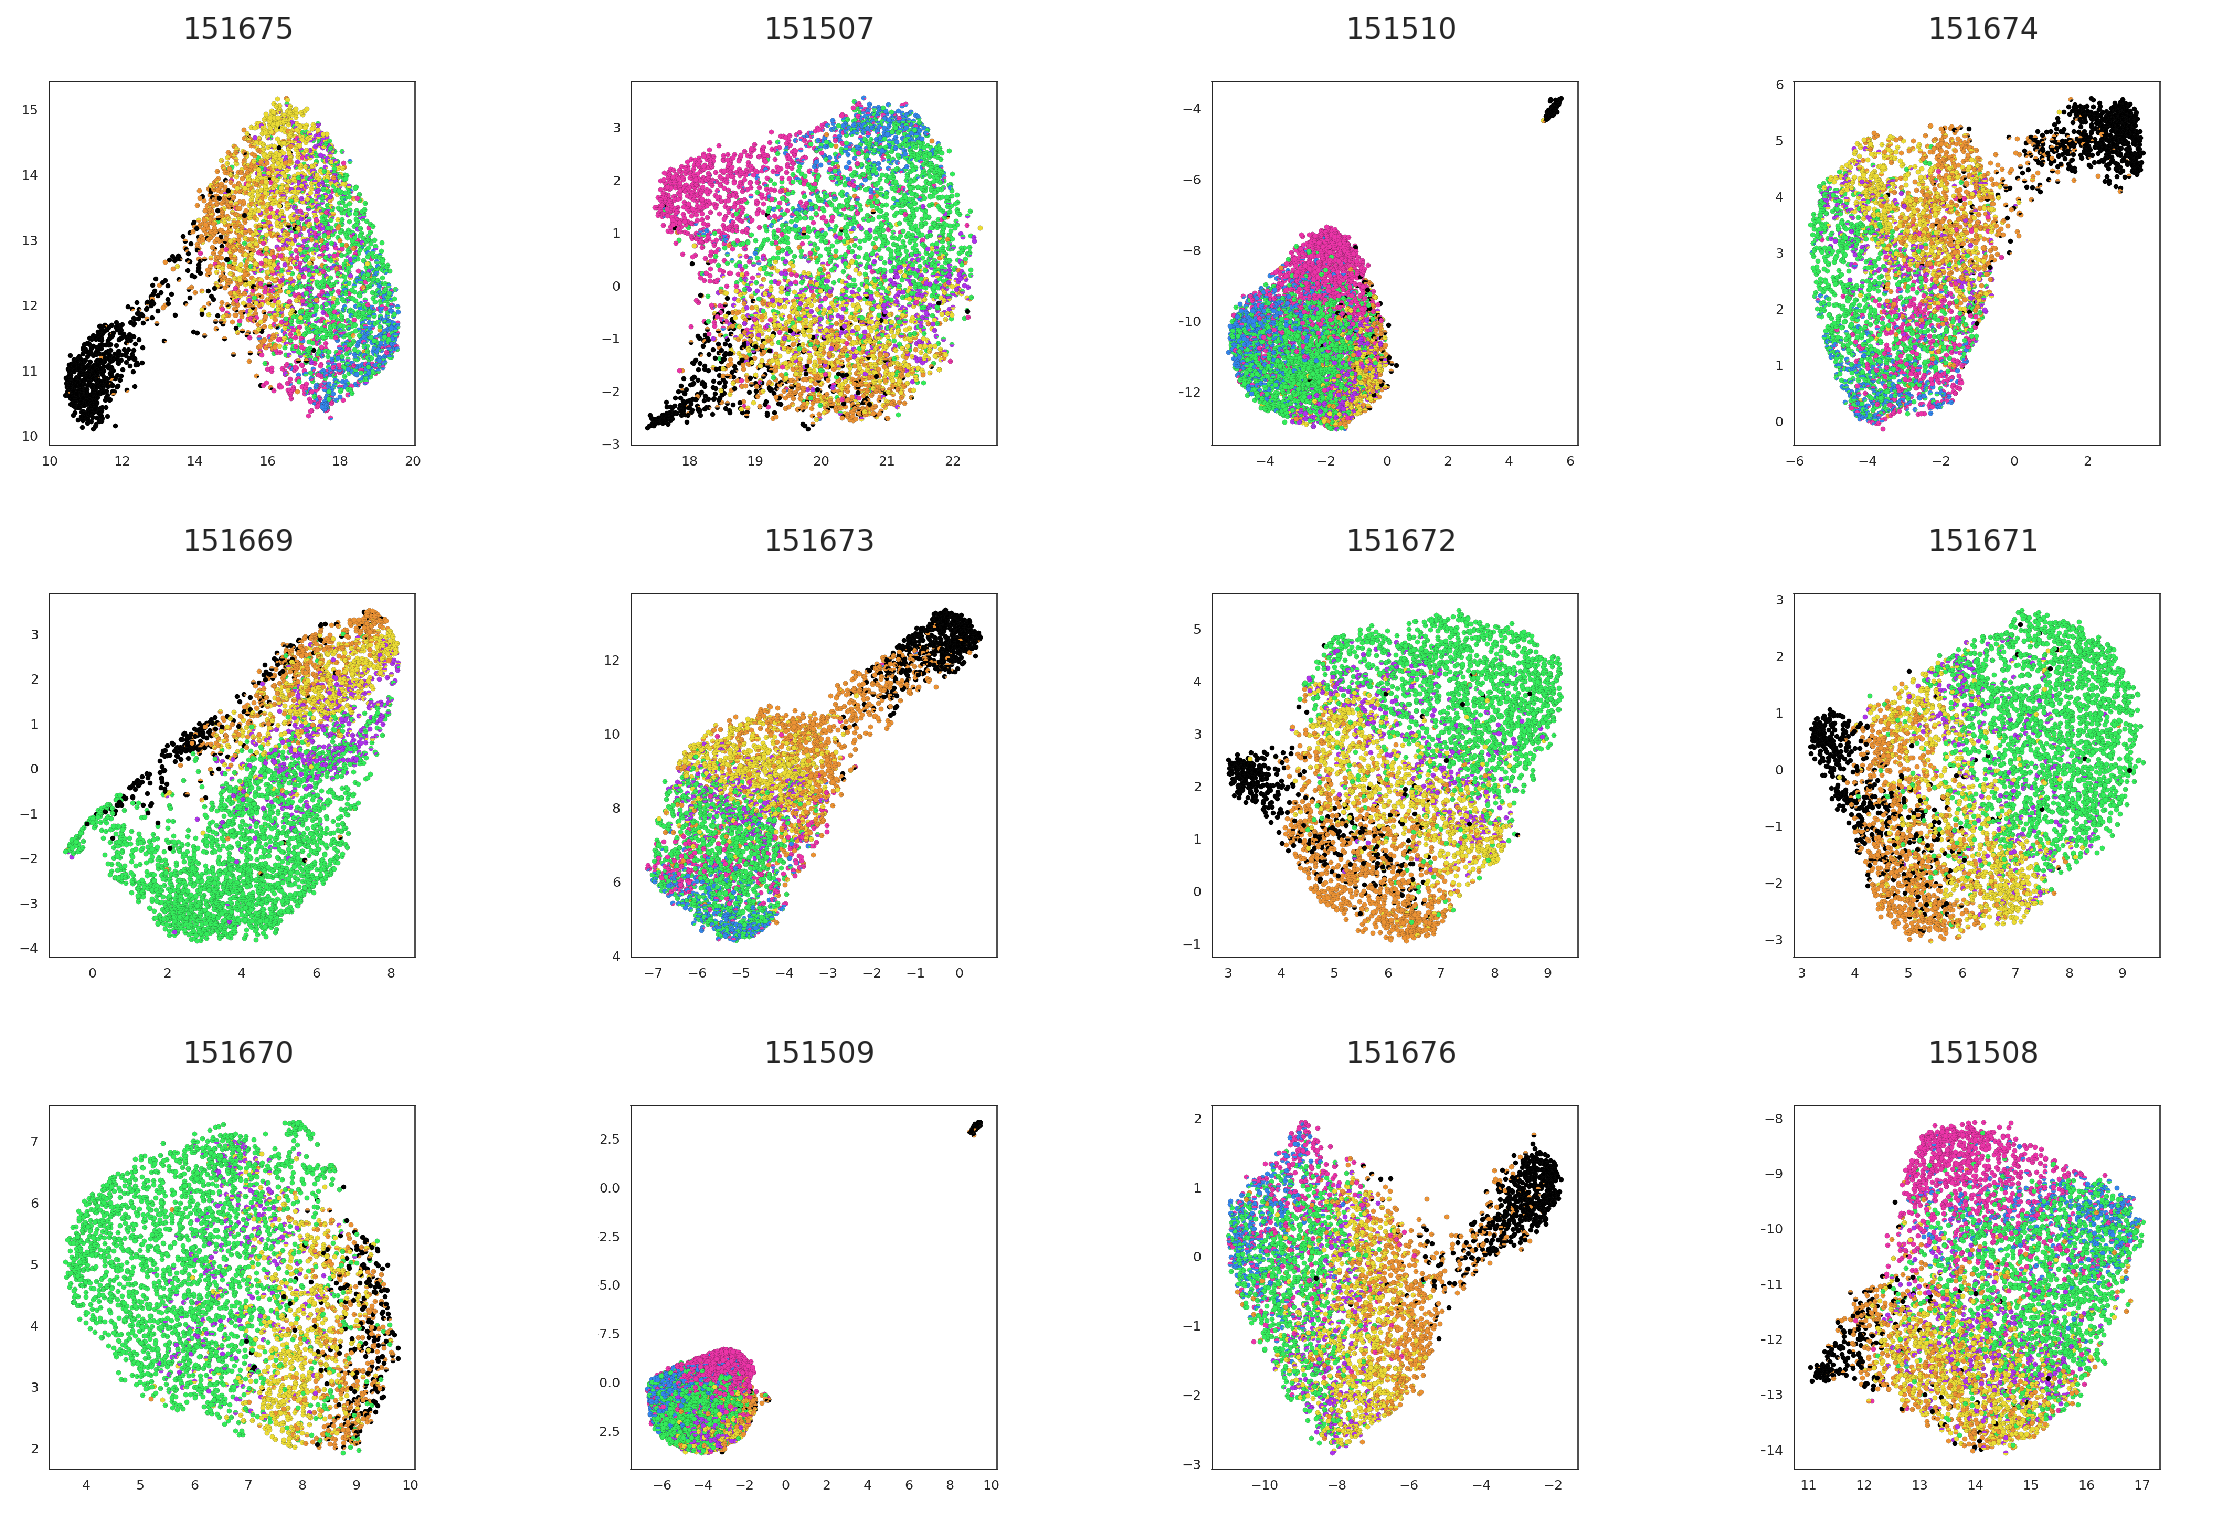

In [15]:
fig, axes = combine_images(
    simba_rna_only_output_df, img_path_col='umap_fig_png',
    x_min=50,
    x_max=900,
    y_min=50,# top
    y_max=900, # bottom
)
plt.show()

# SpatialPCA

In [3]:
spatialpca_fn = '../results/00/spatialpca/spatialpca_adata_py.tsv'
spatialpca_df = pd.read_csv(spatialpca_fn, sep='\t', index_col=0)
spatialpca_df['spatialPCA_dir'] = spatialpca_df['spatialPCA_adata_fn'].apply(lambda x: x.rsplit("/", 1)[0])

In [5]:
spatialpca_df = generate_pca_figures(
    spatialpca_df,
    path_col='spatialPCA_dir',
    fig_path='../results/00/spatialpca/PCA_scatter_pie',
    adata_color_col='spatialLIBD',
    fig_exts=['png'],
    cell_embedding_adata_fn='spatialPCA_to_py.adata.h5ad',
    original_adata_CG_dir="../data/human_DLPFC", 
    plot_method='scatter_pie',
    fig_size=(6, 6),
    size=20,
)

  0%|          | 0/12 [00:00<?, ?it/s]


AttributeError: 'Index' object has no attribute 'to_array'

# 